<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/Global_EV_Dataset_Predict_EV_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Global EV 2023.csv")
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,4.600000e-04
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,1.700000e+02
...,...,...,...,...,...,...,...,...
9537,World,Projection-APS,EV stock,Trucks,PHEV,2030,Vehicles,9.100000e+05
9538,World,Projection-APS,EV stock,Vans,BEV,2030,Vehicles,1.200000e+07
9539,World,Projection-APS,EV stock,Vans,PHEV,2030,Vehicles,1.300000e+06
9540,World,Projection-APS,EV stock,Cars,BEV,2030,Vehicles,1.800000e+08


In [3]:
# lets see the info:
def Info(df):
  print(f"Total records: {df.shape}\n")
  print(f"Columns are:\n {df.columns}\n")
  print("*"*170)

  # lets chcek the data types and null values:
  print("Info:\n")
  print(f"{df.info()}\n")
  print(f"Null values:\n\n{df.isnull().sum()}")
Info(df)

Total records: (9542, 8)

Columns are:
 Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

**************************************************************************************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      9542 non-null   object 
 1   category    9542 non-null   object 
 2   parameter   9542 non-null   object 
 3   mode        9542 non-null   object 
 4   powertrain  9542 non-null   object 
 5   year        9542 non-null   int64  
 6   unit        9542 non-null   object 
 7   value       9542 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 596.5+ KB
None

Null values:

region        0
category      0
parameter     0
mode          

In [4]:
df.describe(include=object)

,region,category,parameter,mode,powertrain,unit
count,9542,9542,9542,9542,9542,9542
unique,38,3,8,5,5,6
top,China,Historical,EV stock,Cars,EV,Vehicles
freq,828,7579,2388,3316,4254,4624


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,9542.0,2018.359883,4.590404e+00,2010.000000,2015.00,2019.0,2021.0,2030.0
value,9542.0,233137.782380,3.349828e+06,0.000001,0.76,66.0,3800.0,180000000.0


In [6]:
# lets check the categories present under feature:
for i in df.columns:
  if df[i].dtypes == "O":
    print(i,df[i].unique(),sep=":    ")

region:    ['Australia' 'Austria' 'Belgium' 'Brazil' 'Canada' 'Chile' 'China'
 'Denmark' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece' 'Iceland'
 'India' 'Indonesia' 'Israel' 'Italy' 'Japan' 'Korea' 'Mexico'
 'Netherlands' 'New Zealand' 'Norway' 'Other Europe' 'Poland' 'Portugal'
 'Rest of the world' 'South Africa' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Turkiye' 'United Kingdom' 'USA' 'World']
category:    ['Historical' 'Projection-STEPS' 'Projection-APS']
parameter:    ['EV stock' 'EV sales share' 'EV stock share' 'EV sales'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']
mode:    ['Cars' 'EV' 'Buses' 'Vans' 'Trucks']
powertrain:    ['BEV' 'EV' 'PHEV' 'Publicly available fast' 'Publicly available slow']
unit:    ['Vehicles' 'percent' 'charging points' 'GWh' 'Milion barrels per day'
 'Oil displacement, million lge']


### ***EDA:***

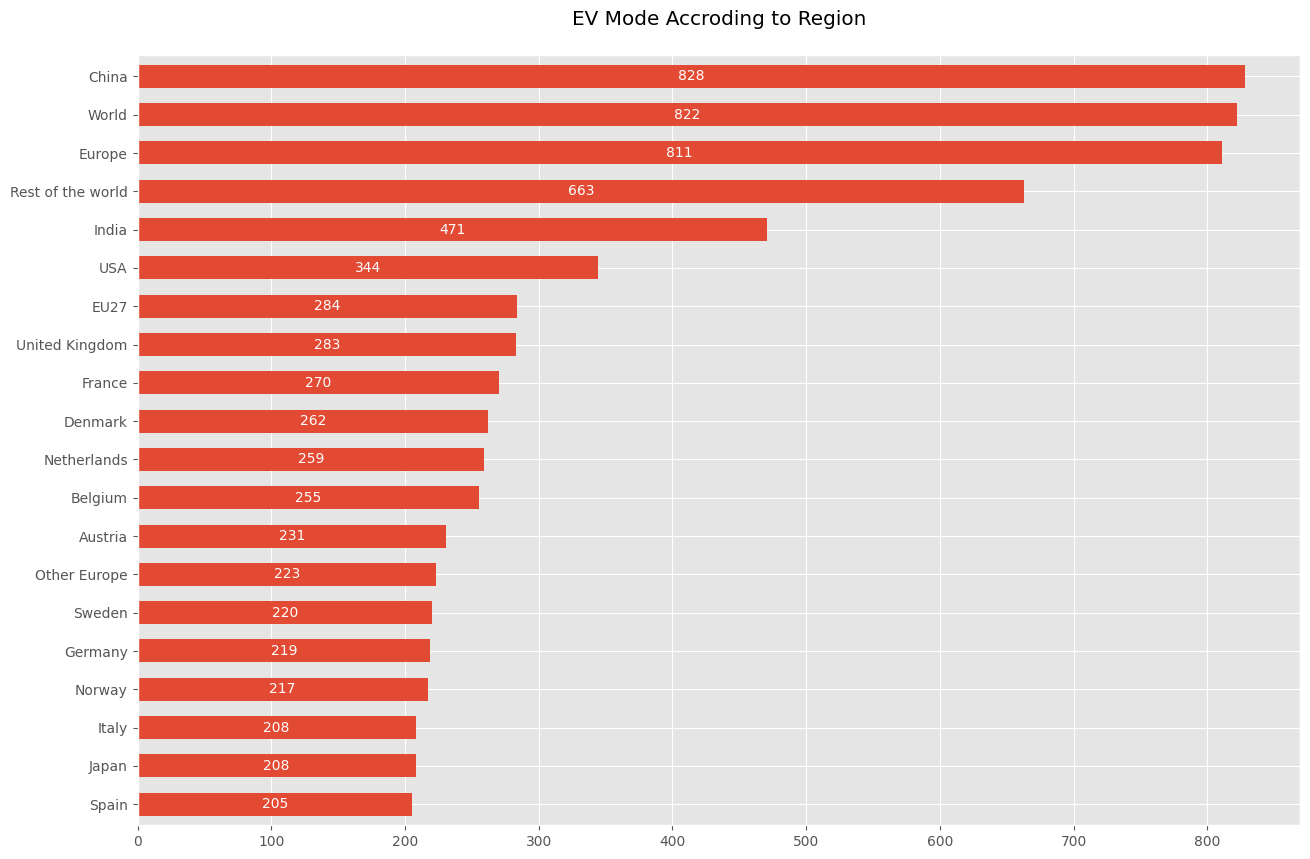

In [7]:
# lets see the EV Data Accroding all categories:
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
region = df.region.value_counts().sort_values()
barh = region[region>= 200].plot.barh(width=0.6)
plt.bar_label(barh.containers[0],label_type="center",color="white")
plt.title("EV Mode Accroding to Region\n")
plt.show()

In [8]:
cols = df.select_dtypes(object)
cols.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'unit'], dtype='object')

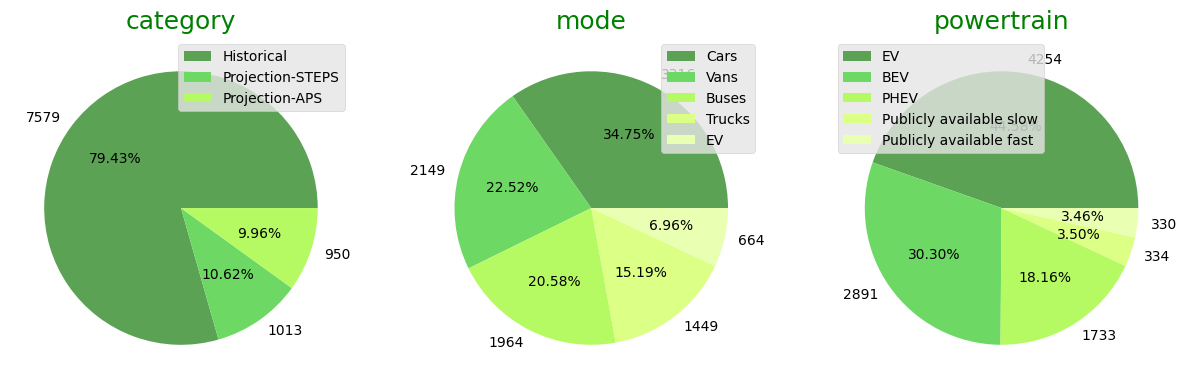

In [40]:
fig, axs =plt.subplots(1,3,figsize=(15,5))
colors = [("#5BA255","#6DD864","#B6FA63"),("#5BA255","#6DD864","#B6FA63","#DCFF85","#E9FFB2"),("#5BA255","#6DD864","#B6FA63","#DCFF85","#E9FFB2")]
for i,col in enumerate(cols[['category','mode','powertrain']].columns):
  ax = axs[i]
  res = cols[col].value_counts()
  ax.pie(res,labels=res.values,autopct="%.2f%%",colors=colors[i])
  ax.set_title(col,color="green",size=18)
  ax.legend(res.index)

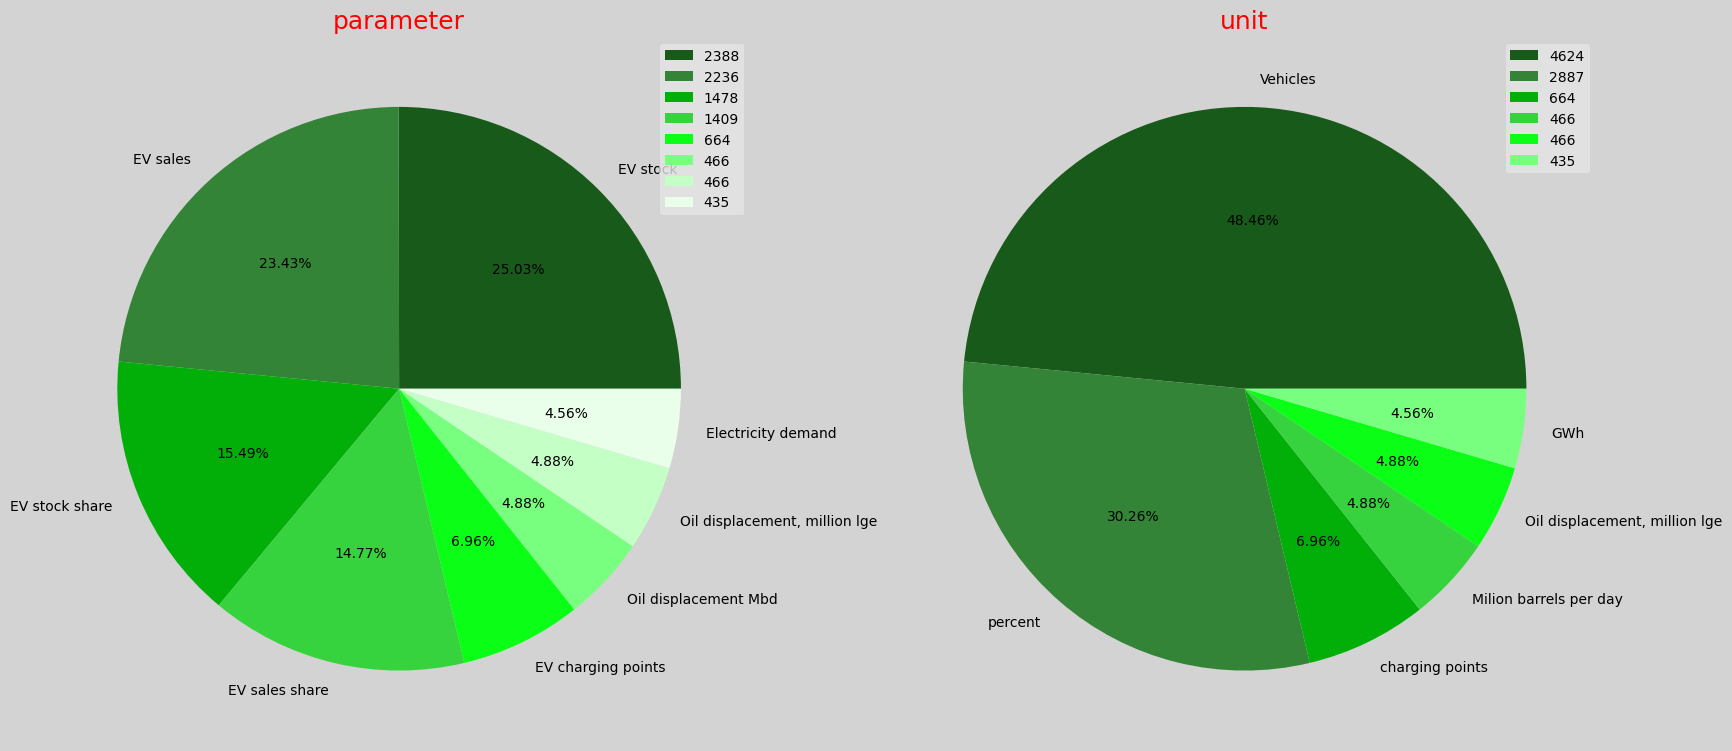

In [10]:
fig,axs = plt.subplots(1,2,facecolor="lightgray",figsize=(20,15))
colors=[('#175A19','#338436',"#02AF09","#37D33E","#0BFE16","#79FF7F","#C4FFC6","#E9FFEA"),('#175A19','#338436',"#02AF09","#37D33E","#0BFE16","#79FF7F")]
for i,col in enumerate(cols[['parameter','unit']].columns):
  ax = axs[i]
  data = df[col].value_counts()
  ax.pie(data,labels=data.index,autopct="%.2f%%",colors=colors[i])
  ax.set_title(col,size=18,color="red")
  ax.legend(data.values)

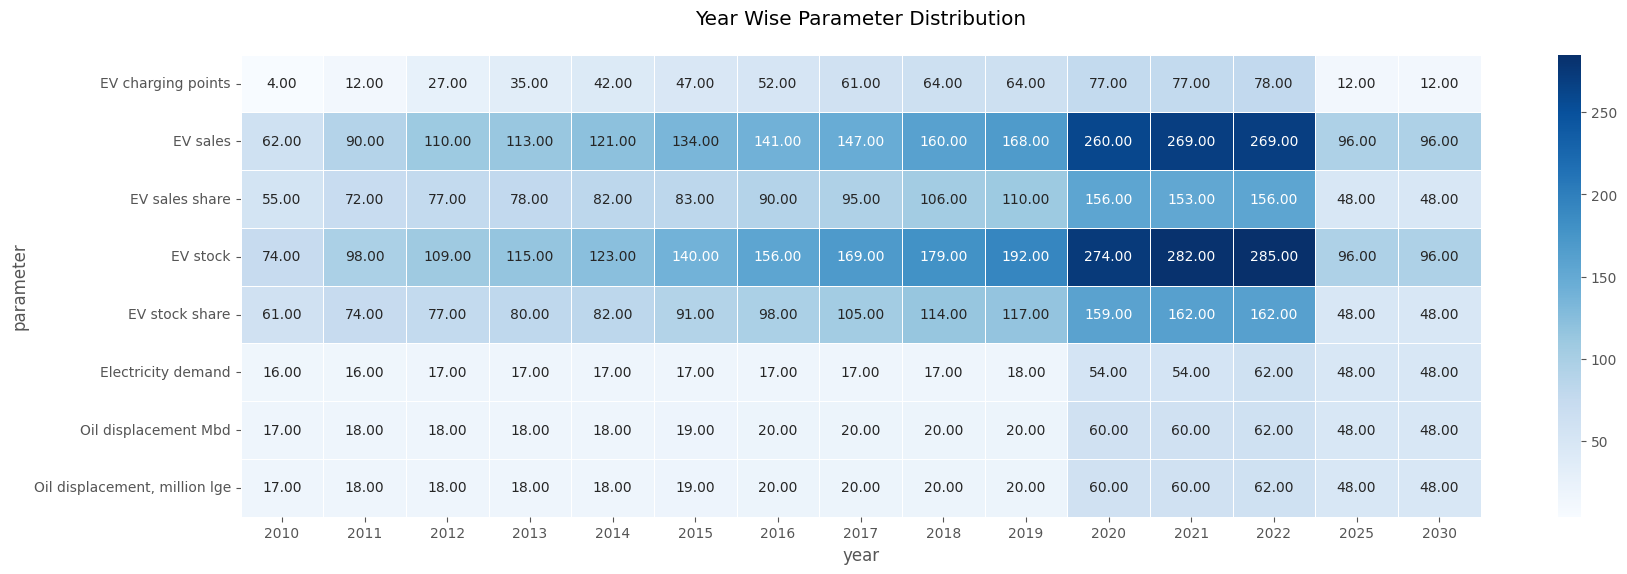

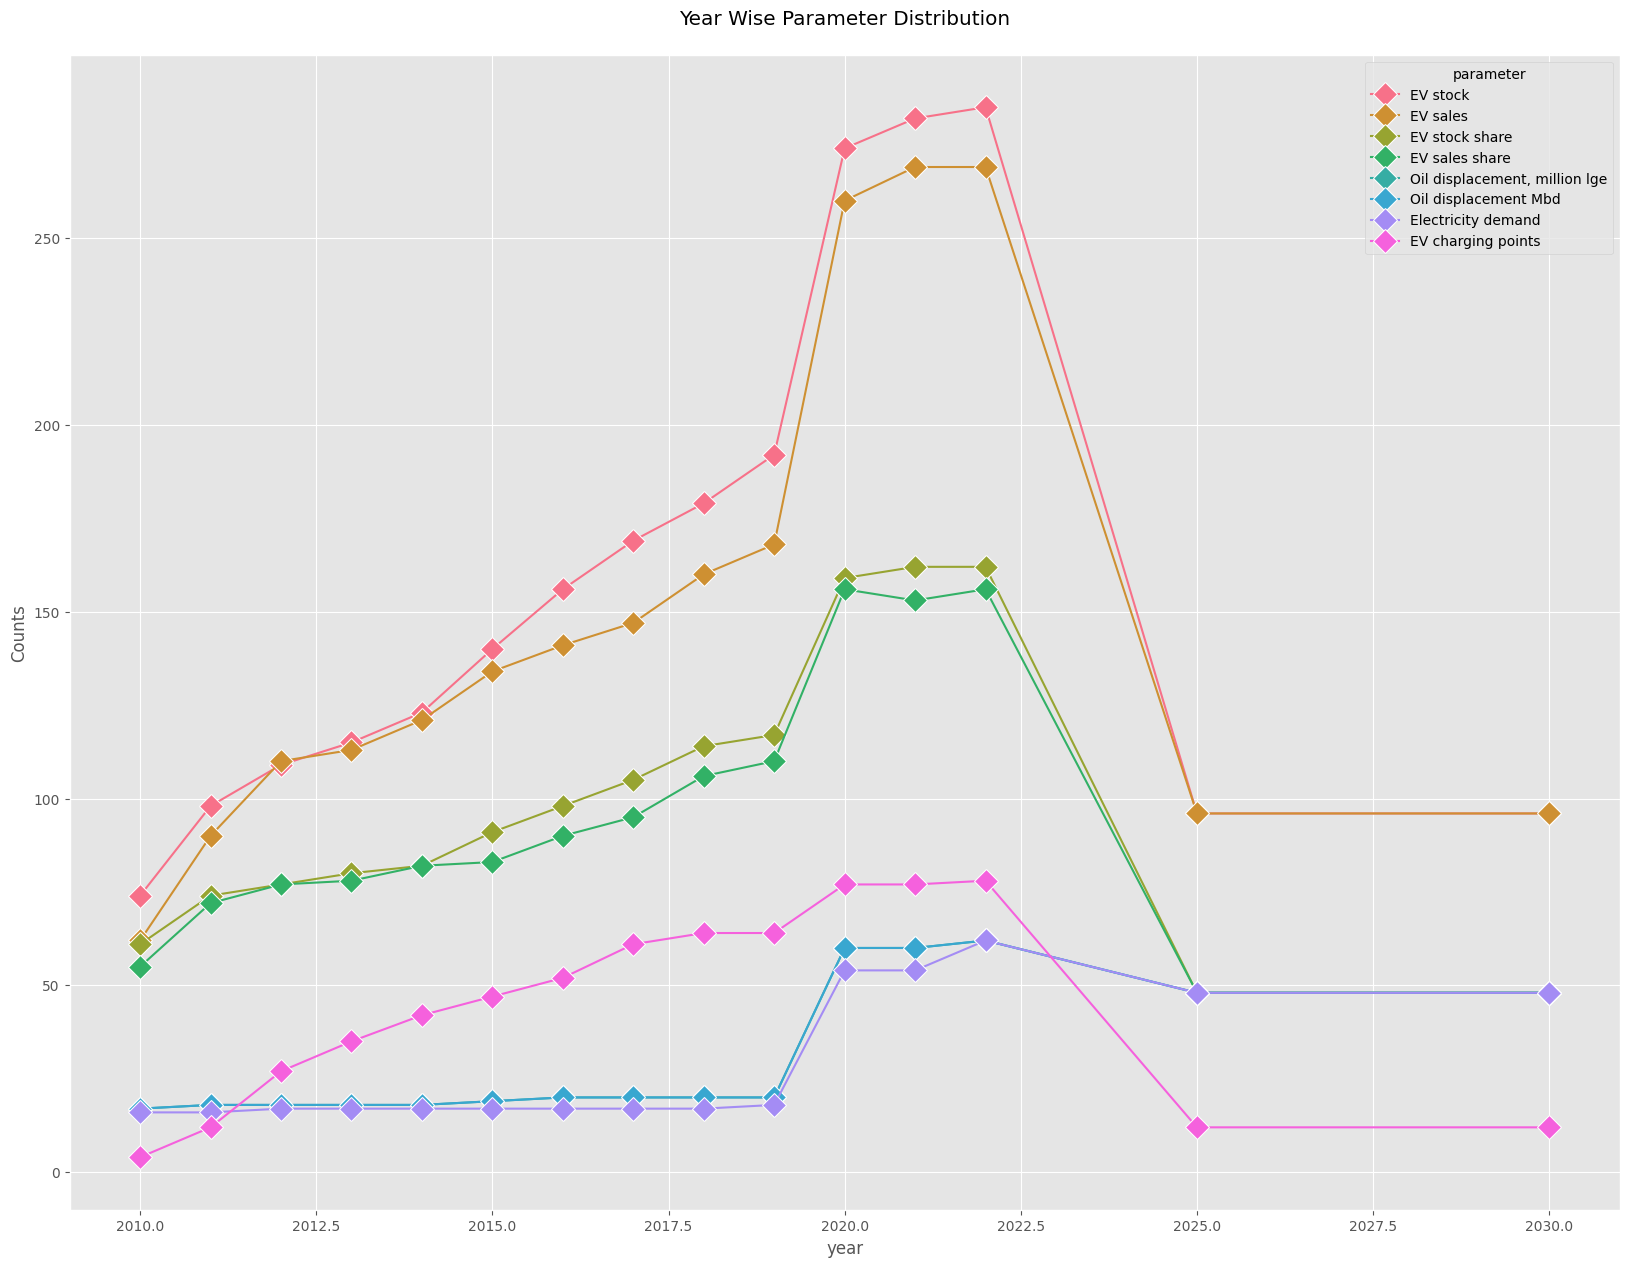

In [11]:
# lets see the year wise parameter.
plt.figure(figsize=(20,6))
year = pd.crosstab(df['parameter'],df['year'])
sns.heatmap(data=year,annot=True,fmt=".2f",linewidth=0.6,cmap="Blues")
plt.title("Year Wise Parameter Distribution\n")
plt.show()

yearWise_Parameter = df.groupby("year")[['parameter']].value_counts().reset_index(name="Counts")
plt.figure(figsize=(20,15))
sns.lineplot(data=yearWise_Parameter,x="year",y="Counts",hue="parameter",marker="D",markersize=12)
plt.title("Year Wise Parameter Distribution\n")
plt.show()

### ***Conclusion:***
- EV stock and its sales rate had high peakedness in in year 2021 to 2022.
- So, as per future trends they indicates EV sales ,stock of shares and reamin category will get stable maybe by year 2025...

- Data we have from 2010 - 2030 lets break it with 5 years and create a counts of historical data

In [12]:
power = df.groupby(['year','category'])[['powertrain']].value_counts().reset_index(name="Counts")
power_train_2025 = power[power.year>=2025]
power_train_2020 = power[(power.year>= 2020) & (power.year<2025)].sort_values(by="Counts",ascending=False)
power_train_2015 = power[(power.year>= 2015) & (power.year<2020)].sort_values(by="Counts",ascending=False)
power_train_2010 = power[(power.year>= 2010) & (power.year<2015)].sort_values(by="Counts",ascending=False)

In [13]:
# lets convert Data Frame of powertrain into pivot table to get the better understanding in heatmap plot
new_power_2010 = power_train_2010.groupby(['year','category','powertrain'])[['Counts']].sum()
new_power_2015 = power_train_2015.groupby(['year','category','powertrain'])[['Counts']].sum()
new_power_2020 = power_train_2020.groupby(['year','category','powertrain'])[['Counts']].sum()
new_power_2025 = power_train_2025.groupby(['year','category','powertrain'])[['Counts']].sum()

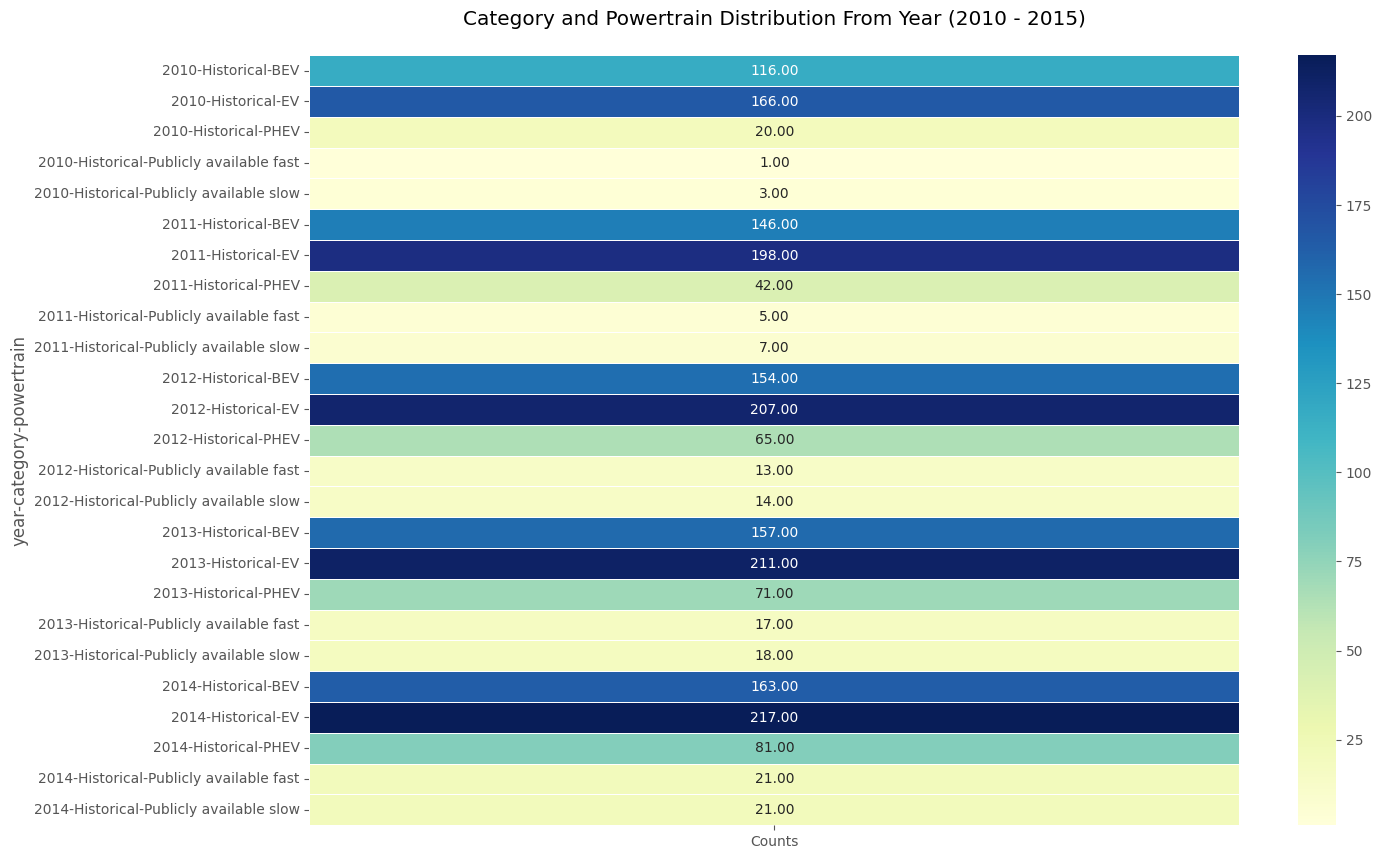

**************************************************************************************************************************************************************************


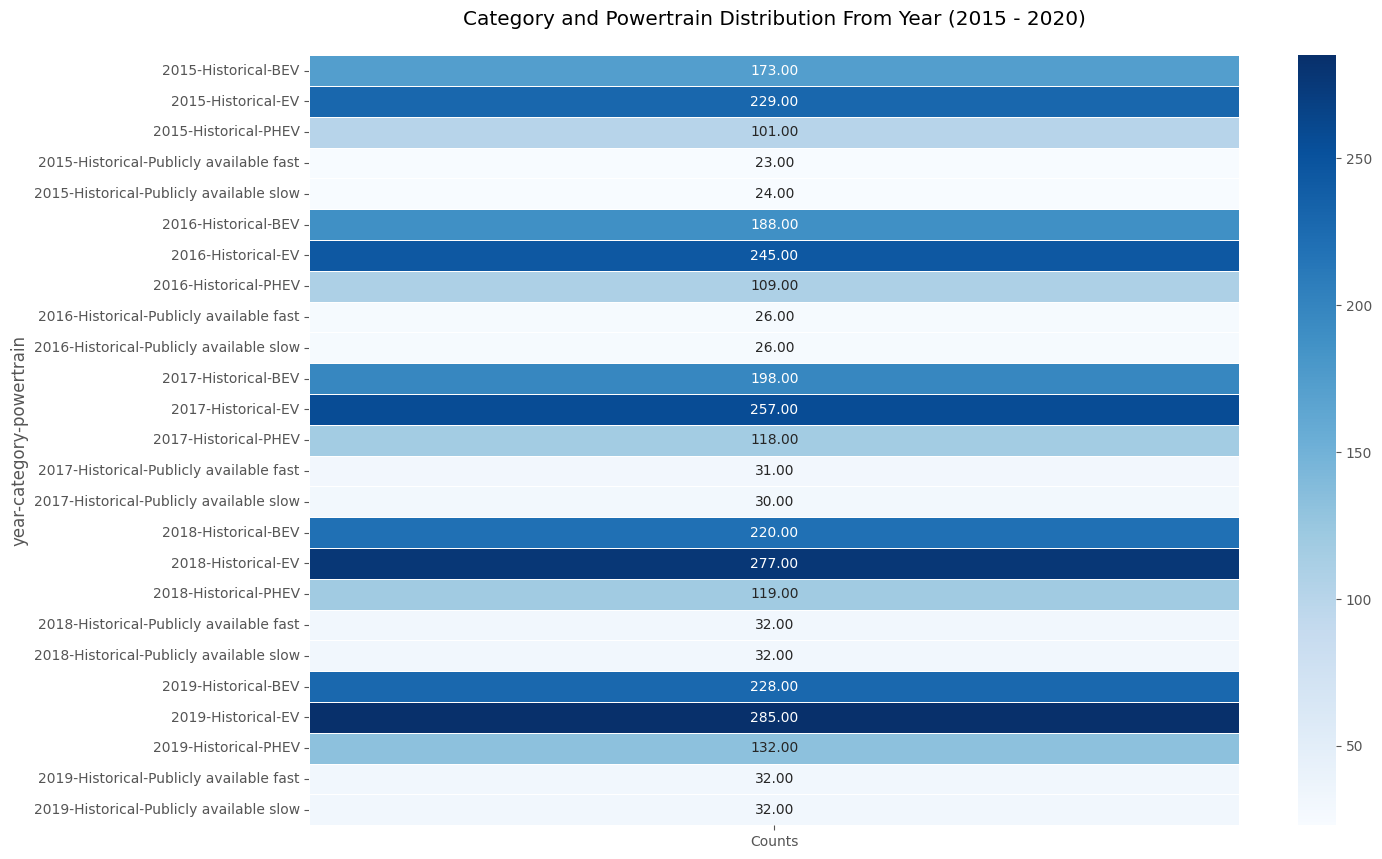

**************************************************************************************************************************************************************************


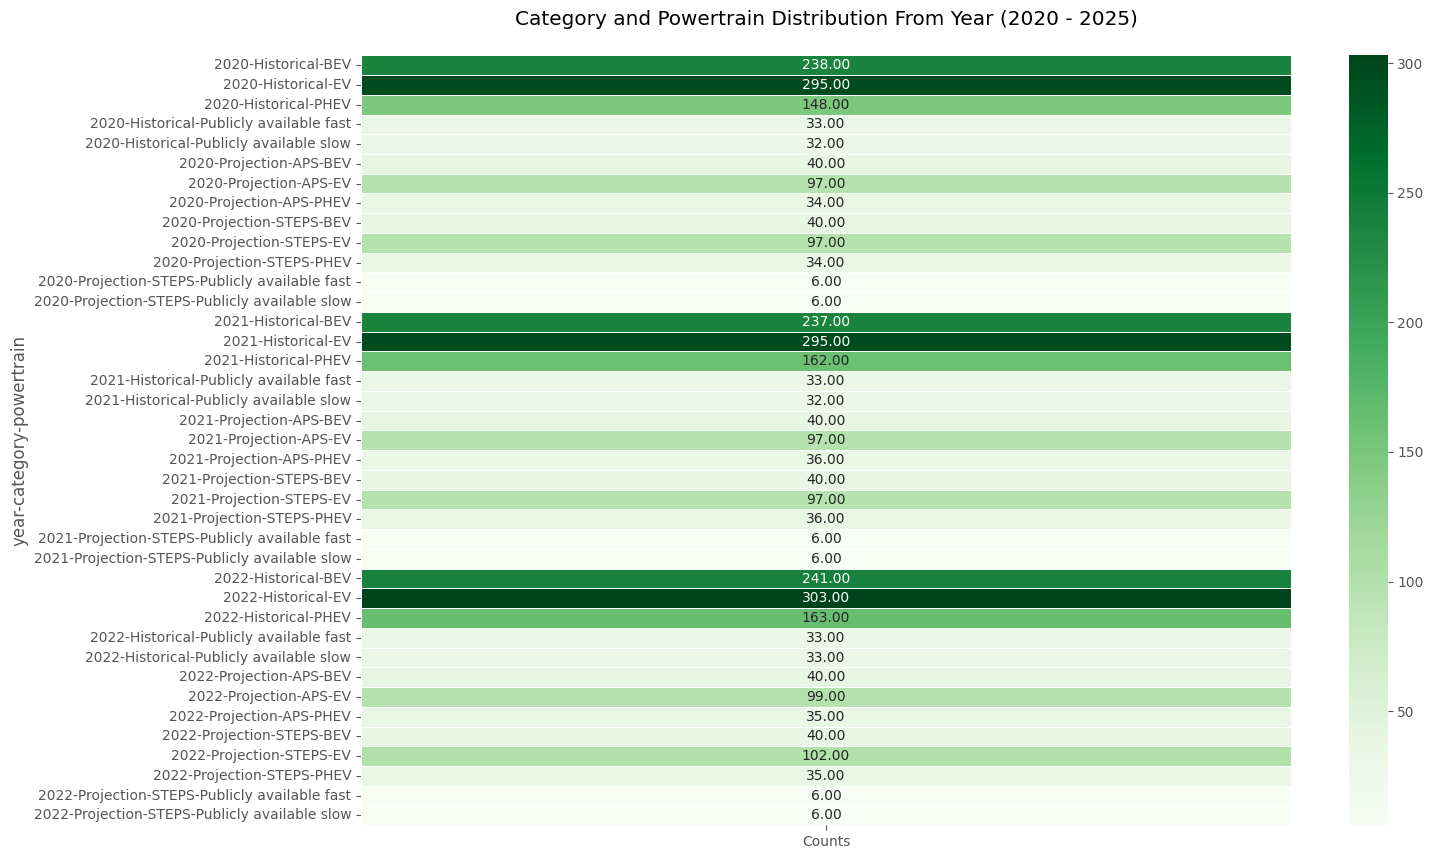

**************************************************************************************************************************************************************************


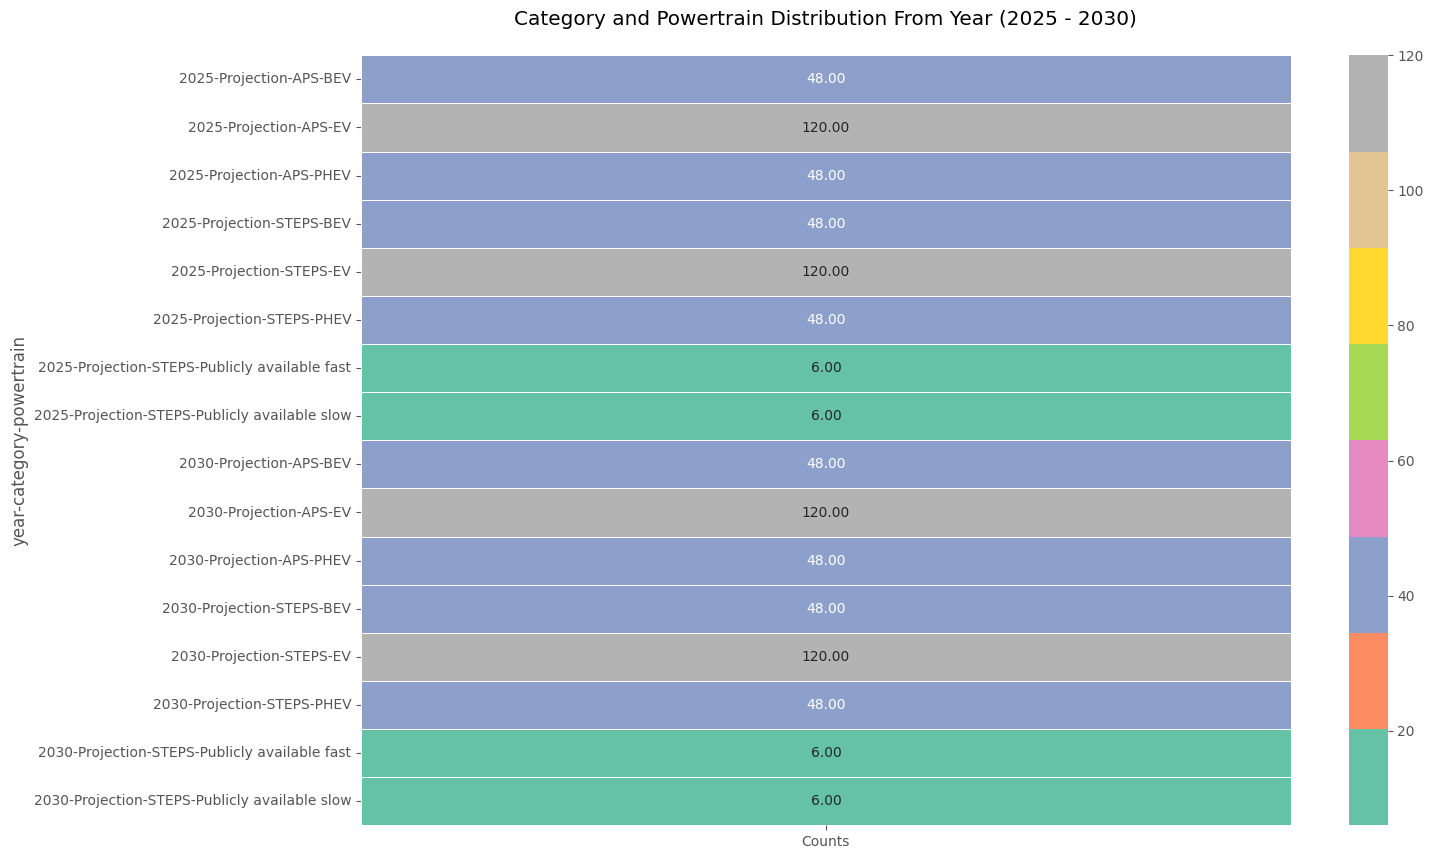

In [14]:
# lets see the powertrain data wrt category and year:
plt.figure(figsize=(15,10))
sns.heatmap(data= new_power_2010,annot=True,fmt=".2f",linewidth=0.6,cmap="YlGnBu")
plt.title("Category and Powertrain Distribution From Year (2010 - 2015)\n")
plt.show()

print("*"*170)

plt.figure(figsize=(15,10))
sns.heatmap(data=new_power_2015,annot=True,fmt=".2f",linewidth=0.6,cmap="Blues")
plt.title("Category and Powertrain Distribution From Year (2015 - 2020)\n")
plt.show()

print("*"*170)

plt.figure(figsize=(15,10))
sns.heatmap(data=new_power_2020,annot=True,fmt=".2f",linewidth=0.6,cmap="Greens")
plt.title("Category and Powertrain Distribution From Year (2020 - 2025)\n")
plt.show()

print("*"*170)

plt.figure(figsize=(15,10))
sns.heatmap(data=new_power_2025,annot=True,fmt=".2f",linewidth=0.6,cmap="Set2")
plt.title("Category and Powertrain Distribution From Year (2025 - 2030)\n")
plt.show()

Text(0.5, 1.0, 'Units Accroding to Target Column\n')

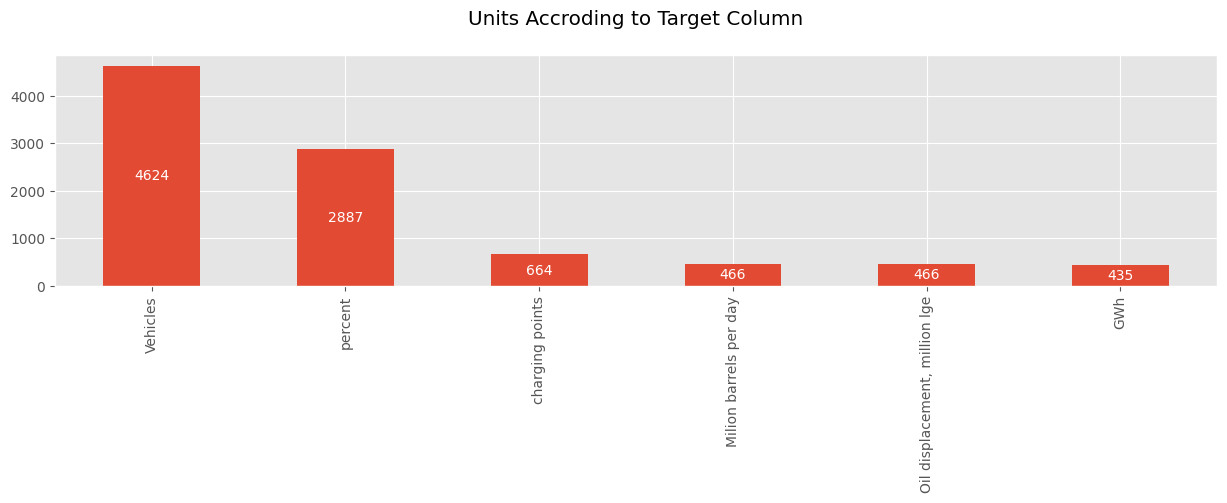

In [15]:
# lets see how Target Column indicates with different unit:
plt.figure(figsize=(15,3))
bar = df.unit.value_counts().plot.bar()
plt.bar_label(bar.containers[0],label_type="center",color="white");
plt.title("Units Accroding to Target Column\n")


#### ***1) Regression Model --> LinearRegression, DecisionTree.. (Accuracy)***
#### ***2) Model Evaluation --> Comparision...***  
#### ***4) We dont have So many Features but for Knowledge purpose we are going to use feature Selection further..***

In [41]:
# import the Useful libraries:

# for Data Preprocessing:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# for modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# for splitting the data:
from sklearn.model_selection import train_test_split

# for scaling:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# for evalaution:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

###### ***Lets do Data Preprocessing:***

In [17]:
X = df.iloc[:,:-1]
X[:2]

,region,category,parameter,mode,powertrain,year,unit
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles
1,Australia,Historical,EV sales share,Cars,EV,2011,percent


In [18]:
y = df.value
y[:2]

0    49.0000
1     0.0065
Name: value, dtype: float64

In [19]:
encode = LabelEncoder()

In [20]:
# lets use Label encoding:
for i in X.drop(columns='year').columns:
  X[i] = encode.fit_transform(X[i])

<Axes: >

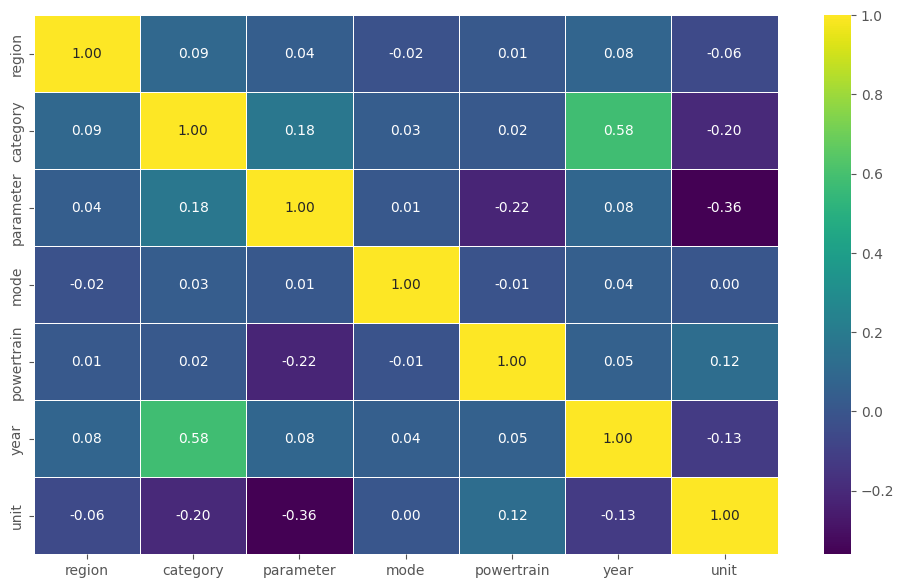

In [21]:
# lets see the correlation:
plt.figure(figsize=(12,7))
sns.heatmap(data=X.corr(),annot=True,fmt=".2f",linewidth=0.7,cmap="viridis")

### ***Lets use Feature Scaling:***


In [22]:
scale = MinMaxScaler()

X_scaled = scale.fit_transform(X)

In [23]:
X_scaled[:2]

array([[0.        , 0.        , 0.42857143, 0.25      , 0.        ,
        0.05      , 0.6       ],
       [0.        , 0.        , 0.28571429, 0.25      , 0.25      ,
        0.05      , 1.        ]])

### ***Data Splitting:***

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

### ***Modeling:***

In [25]:
def Model_EVal(x_train, y_train, x_test, y_test):

    classifiers = [
        LinearRegression(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
    ]

    class_names = [
        "LinearRegression",
        "DecisionTreeRegressor",
        "RandomForestRegressor",
    ]

    metrics = pd.DataFrame(columns=['mean_squared_error', 'mean_absolute_error', 'r2_score'])

    for i, clf in enumerate(classifiers):
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        # lets do Evaluation:
        mean_sq_error = mean_squared_error(y_test, y_pred)
        mean_abs_error = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        metrics.loc[class_names[i], "mean_squared_error"] = mean_sq_error
        metrics.loc[class_names[i], "mean_absolute_error"] = mean_abs_error
        metrics.loc[class_names[i], "r2_score"] = r2

    metrics = metrics.sort_values(by="r2_score",ascending=False)

    return metrics

metrics = Model_EVal(x_train, y_train, x_test, y_test)

In [26]:
metrics

,mean_squared_error,mean_absolute_error,r2_score
DecisionTreeRegressor,1954534493427.989258,78593.038785,0.909181
RandomForestRegressor,4343418679493.350586,155262.81872,0.79818
LinearRegression,21150643956068.980469,617942.368716,0.017223


### ***Lets use One Hot Encoding:***

In [27]:
X1 = df.iloc[:,:-1]

In [28]:
X1 = pd.get_dummies(X1.drop(columns=['year']),drop_first=True)

In [29]:
X1.insert(0,"year",df['year'].values)

In [30]:
X1.head()

,year,region_Austria,region_Belgium,region_Brazil,region_Canada,region_Chile,region_China,region_Denmark,region_EU27,region_Europe,...,mode_Vans,powertrain_EV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow,unit_Milion barrels per day,"unit_Oil displacement, million lge",unit_Vehicles,unit_charging points,unit_percent
0,2011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2011,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2011,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,2011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### ***To handle the Multicollineairty issue we can drop the columns or we can use feature selection techniques:***
- We have input categorical data nd OUtput Numeric so we can use Mutual-info-Regressor...

In [33]:
from sklearn.feature_selection import mutual_info_regression

In [34]:
# It is not class its a method so we have supply the inp and output in it..
score = mutual_info_regression(X1,y)

In [35]:
# lets check the score:
X1_feat = pd.DataFrame(score,columns=['scores'])
X1_feat.index = X1.columns
X1_feat[:2]

,scores
year,0.120375
region_Austria,0.011615


In [36]:
# lets take highest 30 features:
X1_feat = X1_feat.nlargest(30,"scores")


# Now use this features only:
X1.loc[:,X1_feat.index]
X1

,year,region_Austria,region_Belgium,region_Brazil,region_Canada,region_Chile,region_China,region_Denmark,region_EU27,region_Europe,...,mode_Vans,powertrain_EV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow,unit_Milion barrels per day,"unit_Oil displacement, million lge",unit_Vehicles,unit_charging points,unit_percent
0,2011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2011,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2011,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,2011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,2030,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9538,2030,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9539,2030,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
9540,2030,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
# Lets scaled the Data:
X1_scaled = scale.fit_transform(X1)

In [38]:
# lets split the data and check the model Evaulation:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1_scaled,y,test_size=0.3,random_state=42)

### ***We already Created a function Model_EVal So we can use it for multiple Times as per usecase of functions***

In [39]:
Metrics = Model_EVal(x1_train,y1_train,x1_test,y1_test)
print(f"After using Label Encoder Models performance Evaluetion:\n\n{metrics}")
print("*"*100)
print(f"After Using Dummy Varibales and Selecting the 30 Features by MutualClassRegressor Models performance Evaluetion:\n\n{Metrics}")

After using Label Encoder Models performance Evaluetion:

                          mean_squared_error mean_absolute_error  r2_score
DecisionTreeRegressor   1954534493427.989258        78593.038785  0.909181
RandomForestRegressor   4343418679493.350586        155262.81872   0.79818
LinearRegression       21150643956068.980469       617942.368716  0.017223
****************************************************************************************************
After Using Dummy Varibales and Selecting the 30 Features by MutualClassRegressor Models performance Evaluetion:

                          mean_squared_error mean_absolute_error  r2_score
RandomForestRegressor   4484119423239.361328       158983.900058  0.693283
LinearRegression       13918101556551.416016       700378.448695  0.047991
DecisionTreeRegressor  13967131566784.019531       189831.446258  0.044638
